In [1]:
!pip install scikit-fuzzy



In [1]:
import numpy as np
import skfuzzy as fuzz
import skfuzzy.control as ctrl
import matplotlib.pyplot as plt

## The universe
It is the range of the inputs.
Sparse universe makes calculations faster, without sacrifice accuracy. In our case, we don't want floating points here.
Only the critical points are included here; making it higher resolution is unnecessary.

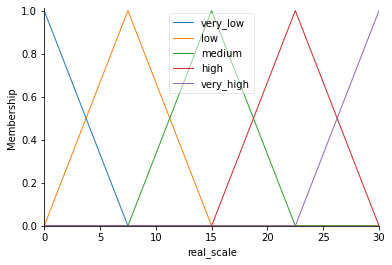

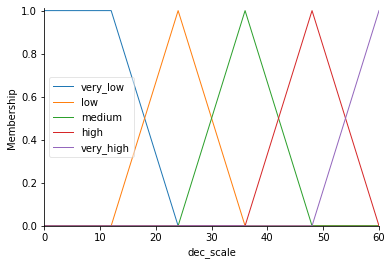

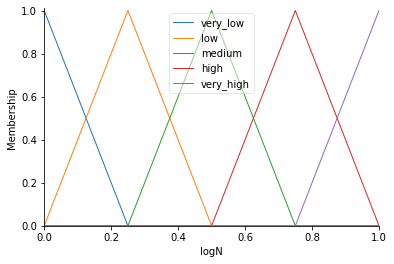

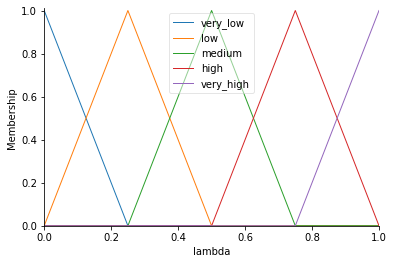

In [3]:
class BaseFL(object):
    Inf = 1 << 32
    def __init__(self):
        self.initialize()
        self.sim = None
    
    def initialize(self):
        self.generate_antecedent()
        self.generate_consequent()
        self.generate_rules()
        self.generate_ctrl_system()
    @staticmethod
    def get_uniform(var):
        var['very_low'] = fuzz.trimf(var.universe, [-BaseFL.Inf, 0, 2.5])
        var['low'] = fuzz.trimf(var.universe, [0, 2.5, 5])
        var['medium'] = fuzz.trimf(var.universe, [2.5, 5, 7.5])
        var['high'] = fuzz.trimf(var.universe, [5, 7.5, 10])
        var['very_high'] = fuzz.trimf(var.universe,[7.5, 10, BaseFL.Inf])
        return var
    
    @staticmethod
    def get_mult_depth():
        mult_depth = ctrl.Antecedent(np.arange(0, 34.1, 1), 'mult_depth')
        mult_depth['very_low'] = fuzz.trimf(mult_depth.universe, [-BaseFL.Inf, 0, 7])
        mult_depth['low'] = fuzz.trimf(mult_depth.universe, [0, 7, 14])
        mult_depth['medium'] = fuzz.trimf(mult_depth.universe, [7, 14, 21])
        mult_depth['high'] = fuzz.trimf(mult_depth.universe, [14, 21, 28])
        mult_depth['very_high'] = fuzz.trimf(mult_depth.universe,[21, 28, BaseFL.Inf])
        #mult_depth.view()
        return mult_depth
    
    @staticmethod
    def get_security():
        security = ctrl.Antecedent(np.arange(0, 10.5, .5), 'security')
        security = BaseFL.get_uniform(security)
        #security.automf(names = ['very_low', 'low', 'medium', 'high', 'very_high'])
        #security.view()
        return security     
    
    @staticmethod
    def get_precision():
        precision = ctrl.Antecedent(np.arange(0, 10.5, .5), 'precision')
        precision = BaseFL.get_uniform(precision)
        #precision.automf(names = ['very_low', 'low', 'medium', 'high', 'very_high'])
        #precision.view()
        return precision
    
    @staticmethod
    def get_performance():
        performance = ctrl.Antecedent(np.arange(0, 10.5, .5), 'performance')
        performance = BaseFL.get_uniform(performance)
        #performance.automf(names = ['very_low', 'low', 'medium', 'high', 'very_high'])
        #performance.view()
        return performance
    
    @staticmethod
    def get_perfsec():
        perfsec = ctrl.Antecedent(np.arange(0, 10.5, .5), 'perfsec')
        perfsec = BaseFL.get_uniform(perfsec)
        #perfsec.automf(names = ['very_low', 'low', 'medium', 'high', 'very_high'])
        #perfsec.view()
        return perfsec
    
    @staticmethod
    def generate_real_scale(fz_type='consequent'):
        real_scale = None
        universe = np.arange(0, 30.1, 0.5)
        var_name = 'real_scale'
        
        if fz_type == 'antecedent':
            real_scale = ctrl.Antecedent(universe, var_name)
        elif fz_type == 'consequent':
            real_scale = ctrl.Consequent(universe, var_name, defuzzify_method='centroid')
        else:
            raise Exception("Options available are antecedent and consequent")
        real_scale['very_low'] = fuzz.trimf(real_scale.universe, [-BaseFL.Inf, 0, 7.5])
        real_scale['low'] = fuzz.trimf(real_scale.universe, [0, 7.5, 15])
        real_scale['medium'] = fuzz.trimf(real_scale.universe, [7.5, 15, 22.5])
        real_scale['high'] = fuzz.trimf(real_scale.universe, [15, 22.5, 30])
        real_scale['very_high'] = fuzz.trimf(real_scale.universe,[22.5, 30, BaseFL.Inf])
        #real_scale.automf(names = ['very_low', 'low', 'medium', 'high', 'very_high'])
        real_scale.view()
        return real_scale
    
    @staticmethod
    def generate_dec_scale(fz_type='consequent'):
        dec_scale = None
        universe = np.arange(0, 60.1, 1)
        var_name = 'dec_scale'
        if fz_type == 'antecedent':
            dec_scale = ctrl.Antecedent(universe, var_name)
        elif fz_type == 'consequent':
            dec_scale = ctrl.Consequent(universe, var_name, defuzzify_method='centroid')
        else:
            raise Exception("Options available are antecedent and consequent")
            
        dec_scale['very_low'] = fuzz.trimf(dec_scale.universe, [-BaseFL.Inf, 12, 24])
        dec_scale['low'] = fuzz.trimf(dec_scale.universe, [12, 24, 36])
        dec_scale['medium'] = fuzz.trimf(dec_scale.universe, [24, 36, 48])
        dec_scale['high'] = fuzz.trimf(dec_scale.universe, [36, 48, 60])
        dec_scale['very_high'] = fuzz.trimf(dec_scale.universe,[48, 60, 60])
        #dec_scale.automf(names = ['very_low', 'low', 'medium', 'high', 'very_high'])
        dec_scale.view()
        plt.savefig("a.pdf")
        return dec_scale 
    
    @staticmethod
    def generate_logN(fz_type='consequent'):
        logN = None
        universe = np.arange(0.0, 1.01, 0.05)
        var_name = 'logN'
        if fz_type == 'antecedent':
            logN = ctrl.Antecedent(universe, var_name)
        elif fz_type == 'consequent':
            logN = ctrl.Consequent(universe, var_name, defuzzify_method='centroid')
        else:
            raise Exception("Options available are antecedent and consequent")
            
        logN['very_low'] = fuzz.trimf(logN.universe, [-BaseFL.Inf, 0.0, 0.25])
        logN['low'] = fuzz.trimf(logN.universe, [0.0, 0.25, 0.5])
        logN['medium'] = fuzz.trimf(logN.universe, [0.25, 0.5, 0.75])
        logN['high'] = fuzz.trimf(logN.universe, [0.5, 0.75, 1.0])
        logN['very_high'] = fuzz.trimf(logN.universe,[0.75, 1.0, BaseFL.Inf])
        #logN.automf(names = ['very_low', 'low', 'medium', 'high', 'very_high'])
        logN.view()
        return logN 

    @staticmethod
    def generate_lambda(fz_type='consequent'):
        lambd = None
        universe = np.arange(0.0, 1.01, 0.05)
        var_name = 'lambda'
        if fz_type == 'antecedent':
            lambd = ctrl.Antecedent(universe, var_name)
        elif fz_type == 'consequent':
            lambd = ctrl.Consequent(universe, var_name, defuzzify_method='centroid')
        else:
            raise Exception("Options available are antecedent and consequent")
            
        lambd['very_low'] = fuzz.trimf(lambd.universe, [-BaseFL.Inf, 0.0, 0.25])
        lambd['low'] = fuzz.trimf(lambd.universe, [0.0, 0.25, 0.5])
        lambd['medium'] = fuzz.trimf(lambd.universe, [0.25, 0.5, 0.75])
        lambd['high'] = fuzz.trimf(lambd.universe, [0.5, 0.75, 1.0])
        lambd['very_high'] = fuzz.trimf(lambd.universe,[0.75, 1.0, BaseFL.Inf])
        #lambd.automf(names = ['very_low', 'low', 'medium', 'high', 'very_high'])
        lambd.view()
        return lambd 
    
    def generate_antecedent(self):
        self.precision = BaseFL.get_precision()
        self.performance = BaseFL.get_performance()
        self.security = BaseFL.get_security()
        self.mult_depth = BaseFL.get_mult_depth()
        self.perfsec = BaseFL.get_perfsec()
        # self.real_scale = BaseFL.generate_real_scale('antecedent')
        # self.dec_scale = BaseFL.generate_dec_scale('antecedent')
        # self.logN = BaseFL.generate_logN('antecedent')
        # self.lambd = BaseFL.generate_lambda('antecedent')
    
    def generate_consequent(self):
        self.real_scale = BaseFL.generate_real_scale('consequent')
        self.dec_scale = BaseFL.generate_dec_scale('consequent')
        self.logN = BaseFL.generate_logN('consequent')
        self.lambd = BaseFL.generate_lambda('consequent')
        
        
    def generate_rules(self):
        self.rules = None
    
    def generate_ctrl_system(self):
        self.ctrl_system = None


bfl = BaseFL()

For Precission[10], Performance[4] and Security[5] we get: 22.50
For Precission[10], Performance[4] and Security[4] we get: 23.07


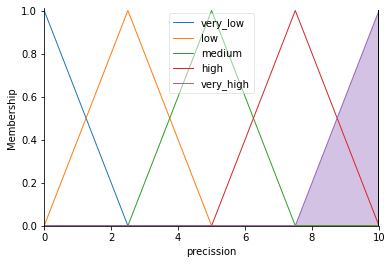

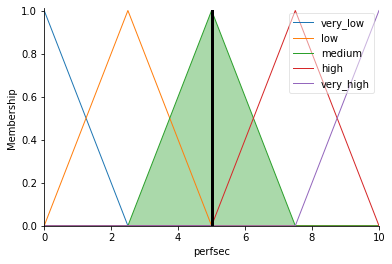

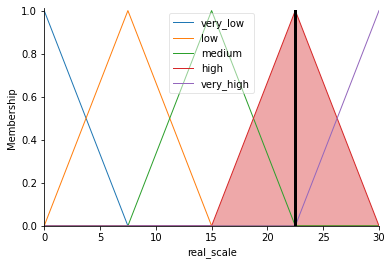

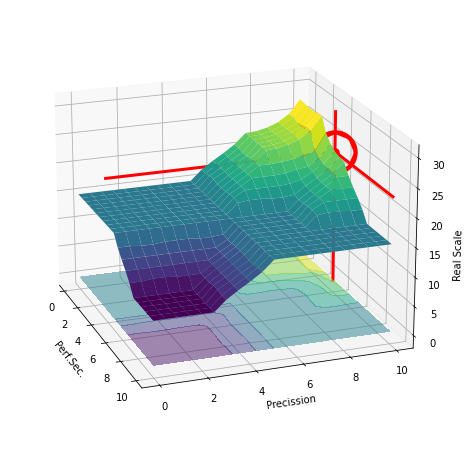

In [4]:
   
class RealScaleFL(BaseFL):
    """
    The real scale is the amount of bits we reserve for the real scale.
    This is influenced by two factors:
        - The precision we want to achieve, because it involves the real precision.
        - The mult depth, since, the bigger the mult depth, the lower the bound can be set.
        - The performance is also influenced by the real scale. The better performance, the lower real_scale.
        - The security is also influenced. The larger real_scale, the lower security.
    """
    def __init__(self):
        super().__init__()
        
    def generate_antecedent(self):
        self.precision = BaseFL.get_precision()
        self.perfsec = BaseFL.get_perfsec()
    
    def generate_consequent(self):
        self.real_scale = BaseFL.generate_real_scale('consequent')
        
    def generate_rules(self):
        self.rules = []
        # Only in cases with all conditions, we consider feasible to have very_low real scale.
        # So having security, performance and mult_depth very_high abd very_low precision we can consider a very_low real_scale
        self.rules.append(ctrl.Rule(antecedent=(self.precision['very_low'] | 
                                                self.perfsec['very_high']), 
                                    consequent=self.real_scale['very_low'], 
                                    label='real_scale very_low'))
        # if either mult_depth or performance or security are high or performance is low, we can have low real_scale
        self.rules.append(ctrl.Rule(antecedent=(self.precision['low'] | 
                                                self.perfsec['high']), 
                                    consequent=self.real_scale['low'], 
                                    label='real_scale low'))
        # if either mult_depth or performance or security performance are medium, we can have medium real_scale
        self.rules.append(ctrl.Rule(antecedent=(self.precision['medium'] |
                                                self.perfsec['medium']), 
                                    consequent=self.real_scale['medium'], 
                                    label='real_scale medium'))
        # if precision is low and mult depth is low then we get real_scale low
        self.rules.append(ctrl.Rule(antecedent=(self.precision['high'] |
                                                self.perfsec['low']), 
                                    consequent=self.real_scale['high'], 
                                    label='real_scale high'))
        # Only in cases with all conditions, we consider feasible to have very_low real scale.
        # So having security, performance and mult_depth very_high abd very_low precision we can consider a very_low real_scale
        self.rules.append(ctrl.Rule(antecedent=(self.precision['very_high'] | 
                                                self.perfsec['very_low']), 
                                    consequent=self.real_scale['very_high'], 
                                    label='real_scale very_high'))
    def generate_rules(self):
        self.rules = []
        
        rules = [
            # Precission, Perfsec,  Real Scale
            ('very_high', 'very_high', 'medium'),
            ('very_high', 'high', 'medium'),
            ('very_high', 'medium', 'high'),
            ('very_high', 'low', 'very_high'),
            ('very_high', 'very_low', 'very_high'),
            ('high', 'very_high', 'medium'),
            ('high', 'high', 'medium'),
            ('high', 'medium', 'medium'),
            ('high', 'low', 'high'),
            ('high', 'very_low', 'high'),
            ('medium', 'very_high', 'medium'),
            ('medium', 'high', 'medium'),
            ('medium', 'medium', 'medium'),
            ('medium', 'low', 'medium'),
            ('medium', 'very_low', 'medium'),
            ('low', 'very_high', 'low'),
            ('low', 'high', 'low'),
            ('low', 'medium', 'medium'),
            ('low', 'low', 'medium'),
            ('low', 'very_low', 'medium'),
            ('very_low', 'very_high', 'low'),
            ('very_low', 'high', 'low'),
            ('very_low', 'medium', 'medium'),
            ('very_low', 'low', 'medium'),
            ('very_low', 'very_low', 'medium'),
            ]
        for a, b, c in rules:
            self.rules.append(ctrl.Rule(antecedent=(self.precision[a] & self.perfsec[b]), 
                                                    consequent=self.real_scale[c], 
                                                    label='[Rule] Precission %s Perfsec %s -> Dec Scale %s'%(a, b, c)))
        
      
    
    def generate_ctrl_system(self):
        self.ctrl_sys = ctrl.ControlSystem(self.rules)
        return self.ctrl_sys
    
    def simulate(self, precision, performance, security, plot=False):
        sim = ctrl.ControlSystemSimulation(self.ctrl_sys) # , flush_after_run=21 * 21 + 1)
        #perfsec = (performance + security) * 0.5
        perfsec = max(performance, security)
        sim.input['perfsec'] = perfsec
        sim.input['precision'] = precision
        sim.compute()
    

        if plot:
            self.precision.view(sim=sim)
            self.perfsec.view(sim=sim)
            self.real_scale.view(sim=sim)
        print("For Precission[%d], Performance[%d] and Security[%d] we get: %0.2f" %(precision, performance, security, sim.output['real_scale']))
        return np.round(sim.output['real_scale'])

        
        
    def plot_meshgrid(self, precision=None, performance=None, security=None):
        
        # We can simulate at higher resolution with full accuracy
        size_x, size_y = int(self.perfsec.universe[-1]), int(self.precision.universe[-1])
        sim = ctrl.ControlSystemSimulation(self.ctrl_sys, flush_after_run= (size_x * size_y) + 1)
        upsampled_x = self.perfsec.universe
        upsampled_y = self.precision.universe
        x, y = np.meshgrid(upsampled_y, upsampled_x)
        z = np.zeros_like(x)

        # Loop through the system 21*21 times to collect the control surface
        for i in range(0, len(upsampled_x)):
            for j in range(0, len(upsampled_y)):
                    sim.input['perfsec'] = x[i, j]
                    sim.input['precision'] = y[i, j]
                    sim.compute()
                    z[i, j] = sim.output['real_scale']
                #dec_scale.view(sim=sim)
                #print(x[i, j], y[i, j], z[i, j])

        # Plot the result in pretty 3D with alpha blending
        import matplotlib.pyplot as plt
        from mpl_toolkits.mplot3d import Axes3D  # Required for 3D plotting

        fig = plt.figure(figsize=(8, 8))
        ax = fig.add_subplot(111, projection='3d')

        surf = ax.plot_surface(x, y, z, rstride=1, cstride=1, cmap='viridis',
                               linewidth=0.4, antialiased=True)
        
        
        perfsec = None
        
        if precision is None or performance is None or security is None:
            precision = 10
            performance = 4
            security = 4
            perfsec = 4
        else:
            #perfsec = (performance + security) * 0.5
            perfsec = max(performance, security)
        
    
        res = self.simulate(precision, performance, security)
        
        lines = np.arange(0, min(size_x, size_y), 1)
        
        lines_x = np.linspace(0, upsampled_y[-1], num=50)
        lines_y = np.linspace(0, upsampled_x[-1], num=50)
        lines_z = np.linspace(0, self.real_scale.universe[-1], num=50)
        
        ones = np.ones_like(lines)
        ones_x = np.ones_like(lines_x)
        ones_y = np.ones_like(lines_y)
        ones_z = np.ones_like(lines_z)
        
        end = ones * lines[-1]
        end_x = ones_x * lines_x[-1]
        end_y = ones_y * lines_y[-1]
        end_z = ones_z * lines_z[-1]
        
        zeros = np.zeros_like(lines)
        zeros_x = np.zeros_like(lines_x)
        zeros_y = np.zeros_like(lines_y)
        zeros_z = np.zeros_like(lines_z)
        
        ax.scatter(perfsec, precision, res, color='red', linewidth=4) 
        ax.scatter(perfsec, precision, res, color='red', linewidth=40)
        ax.plot(perfsec * ones_x, precision * ones_y, lines_z, color='red', linewidth=3)
        ax.plot(perfsec * ones_x, lines_y, res * ones_z, color='red', linewidth=3)
        ax.plot(lines_x, precision * ones_y, res * ones_z, color='red', linewidth=3)
        
        
        
        ax.set_xlabel('Perf.Sec.')#, fontsize=20)
        ax.set_ylabel('Precission')
        ax.set_zlabel('Real Scale')
        cset = ax.contourf(x, y, z, zdir='z', offset=0, cmap='viridis', alpha=0.5)
        #cset = ax.contourf(x, y, z, zdir='x', offset=0, cmap='viridis', alpha=0.5)
        #cset = ax.contourf(x, y, z, zdir='y', offset=20, cmap='viridis', alpha=0.5)
        ax.view_init(20, 340)
        
rsfl = RealScaleFL()
rsfl.simulate(precision=10, performance=4, security=5, plot=True)
# precision, mult_depth, performance, security
#rsfl.simulate(1, 16, 9, 9)
rsfl.plot_meshgrid()


For Real Scale[32] and Mult. Depth[32] we get: 15.00
[[ 0.  1.  2. ... 32. 33. 34.]
 [ 0.  1.  2. ... 32. 33. 34.]
 [ 0.  1.  2. ... 32. 33. 34.]
 ...
 [ 0.  1.  2. ... 32. 33. 34.]
 [ 0.  1.  2. ... 32. 33. 34.]
 [ 0.  1.  2. ... 32. 33. 34.]] [[ 0.   0.   0.  ...  0.   0.   0. ]
 [ 0.5  0.5  0.5 ...  0.5  0.5  0.5]
 [ 1.   1.   1.  ...  1.   1.   1. ]
 ...
 [29.  29.  29.  ... 29.  29.  29. ]
 [29.5 29.5 29.5 ... 29.5 29.5 29.5]
 [30.  30.  30.  ... 30.  30.  30. ]]
(61,) (35,)
For Real Scale[16] and Mult. Depth[20] we get: 16.29
>> 30


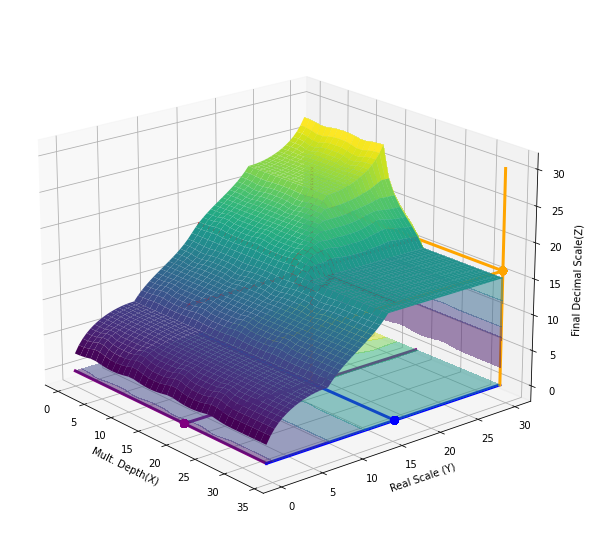

In [5]:
%matplotlib inline

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d  

class RealScaleFL2(BaseFL):
    """
    The real scale is the amount of bits we reserve for the real scale.
    This is influenced by two factors:
        - The precision we want to achieve, because it involves the real precision.
        - The mult depth, since, the bigger the mult depth, the lower the bound can be set.
        - The performance is also influenced by the real scale. The better performance, the lower real_scale.
        - The security is also influenced. The larger real_scale, the lower security.
    """
    def __init__(self):
        super().__init__()
        
    def generate_antecedent(self):
        self.real_scale = BaseFL.generate_real_scale('antecedent')
        self.mult_depth = BaseFL.get_mult_depth()
    
    def generate_consequent(self):
        self.real_scale_final = BaseFL.generate_real_scale('consequent')
        
    def generate_rules(self):
        self.rules = []
        

        # For mult_depths of low and very_low we preserve the choice made in the last section, we don't modify them
        for mult_depth_condition in ['very_low', 'low']:
            for real_scale_condition in ['very_low', 'low', 'medium', 'high', 'very_high']:
                self.rules.append(ctrl.Rule(antecedent=(self.real_scale[real_scale_condition] & self.mult_depth[mult_depth_condition]), 
                                            consequent=self.real_scale_final[real_scale_condition], 
                                            label='if real_scale %s and mult_depth is %s we preserve choice' % (real_scale_condition, mult_depth_condition)))
        
        # Only in cases with all conditions, we consider feasible to have very_low real scale.
        # So having security, performance and mult_depth very_high abd very_low precision we can consider a very_low real_scale
        for mult_depth_condition in ['medium']:
            for real_scale_condition in ['very_low', 'low', 'medium', 'high', 'very_high']:
                self.rules.append(ctrl.Rule(antecedent=(self.real_scale[real_scale_condition] & self.mult_depth[mult_depth_condition]), 
                                            consequent=self.real_scale_final[real_scale_condition], 
                                            label='if real_scale %s and mult_depth is %s we preserve choice' % (real_scale_condition, mult_depth_condition)))
        

        ## HIGH RULES

        self.rules.append(ctrl.Rule(antecedent=(self.real_scale['very_low'] & self.mult_depth['high']), 
                                    consequent=self.real_scale_final['very_low'], 
                                    label='if real_scale very_low and mult_depth is high we preserve choice'))
   
        self.rules.append(ctrl.Rule(antecedent=(self.real_scale['low'] & self.mult_depth['high']), 
                                    consequent=self.real_scale_final['low'], 
                                    label='if real_scale low and mult_depth is high we preserve choice'))
        
        self.rules.append(ctrl.Rule(antecedent=(self.real_scale['medium'] & self.mult_depth['high']), 
                                    consequent=self.real_scale_final['medium'], 
                                    label='if real_scale medium and mult_depth is high we preserve choice'))
   
        self.rules.append(ctrl.Rule(antecedent=(self.real_scale['high'] & self.mult_depth['high']), 
                                    consequent=self.real_scale_final['medium'], 
                                    label='if real_scale high and mult_depth is high we preserve choice'))
    
        self.rules.append(ctrl.Rule(antecedent=(self.real_scale['very_high'] & self.mult_depth['high']), 
                                    consequent=self.real_scale_final['medium'], 
                                    label='if real_scale very_high and mult_depth is high we preserve choice'))
   
        ## VERY HIGH RULES
    
    
        self.rules.append(ctrl.Rule(antecedent=(self.real_scale['very_low'] & self.mult_depth['very_high']), 
                                    consequent=self.real_scale_final['very_low'], 
                                    label='if real_scale very_low and mult_depth is very_high we preserve choice'))
   
        self.rules.append(ctrl.Rule(antecedent=(self.real_scale['low'] & self.mult_depth['very_high']), 
                                    consequent=self.real_scale_final['low'], 
                                    label='if real_scale low and mult_depth is very_high we preserve choice'))
        
        self.rules.append(ctrl.Rule(antecedent=(self.real_scale['medium'] & self.mult_depth['very_high']), 
                                    consequent=self.real_scale_final['medium'], 
                                    label='if real_scale medium and mult_depth is very_high we preserve choice'))
   
        self.rules.append(ctrl.Rule(antecedent=(self.real_scale['high'] & self.mult_depth['very_high']), 
                                    consequent=self.real_scale_final['medium'], 
                                    label='if real_scale high and mult_depth is very_high we preserve choice'))
    
        self.rules.append(ctrl.Rule(antecedent=(self.real_scale['very_high'] & self.mult_depth['very_high']), 
                                    consequent=self.real_scale_final['medium'], 
                                    label='if real_scale very_high and mult_depth is very_high we preserve choice'))
        

                               
    def generate_ctrl_system(self):
        self.ctrl_sys = ctrl.ControlSystem(self.rules)
        return self.ctrl_sys
    
    def simulate(self, real_scale, mult_depth, plot=False):
        sim = ctrl.ControlSystemSimulation(self.ctrl_sys , flush_after_run=21 * 21 + 1)
        sim.input['real_scale'] = real_scale
        sim.input['mult_depth'] = mult_depth
        sim.compute()
    

        if plot:
            self.mult_depth.view(sim=sim)
            self.real_scale.view(sim=sim)
            self.real_scale_final.view(sim=sim)
        print("For Real Scale[%d] and Mult. Depth[%d] we get: %0.2f" %(real_scale, mult_depth, sim.output['real_scale']))
        return np.round(sim.output['real_scale'])

        

    def plot_meshgrid(self, real_scale=None, mult_depth=None):
        size_x, size_y = int(self.real_scale.universe[-1]), int(self.mult_depth.universe[-1])
        sim = ctrl.ControlSystemSimulation(self.ctrl_sys, flush_after_run= (size_x * size_y + 1))
        # We can simulate at higher resolution with full accuracy
        upsampled_x = self.real_scale.universe
        upsampled_y = self.mult_depth.universe
        x, y = np.meshgrid(upsampled_y, upsampled_x)
        
        print(x, y)
        print(upsampled_x.shape, upsampled_y.shape)
        z = np.zeros_like(x)

        # Loop through the system 21*21 times to collect the control surface
        for i in range(0, len(upsampled_x)):
            for j in range(0, len(upsampled_y)):
                    sim.input['mult_depth'] = x[i, j]
                    sim.input['real_scale'] = y[i, j]
                    
                    
                    
                    
                    sim.compute()
                    z[i, j] = sim.output['real_scale']
                    #print(x[j, i], y[j, i], z[j, i])
                #dec_scale.view(sim=sim)
                #print(x[i, j], y[i, j], z[i, j])

        # Plot the result in pretty 3D with alpha blending
        import matplotlib.pyplot as plt
        from mpl_toolkits.mplot3d import Axes3D  # Required for 3D plotting

        fig = plt.figure(figsize=(10, 10))
        ax = fig.add_subplot(111, projection='3d')

        surf = ax.plot_surface(x, y, z, rstride=1, cstride=1, cmap='viridis',
                               linewidth=8, antialiased=True)

        cset = ax.contourf(x, y, z, zdir='z', offset=0, cmap='viridis', alpha=0.5)
        #cset = ax.contourf(x, y, z, zdir='x', offset=0, cmap='viridis', alpha=0.5)
        cset = ax.contourf(x, y, z, zdir='y', offset=upsampled_x[-1], cmap='viridis', alpha=0.5)
        
        
        
        
        ax.set_xlabel('Mult. Depth(X)')#, fontsize=20)
        ax.set_ylabel('Real Scale (Y)')
        ax.set_zlabel('Final Decimal Scale(Z)')
        
        if real_scale is None or mult_depth is None:
            md, sc= 16, 16
        else:
            md, sc = mult_depth, real_scale
        
        res = self.simulate(real_scale=sc, mult_depth=md)
        print(">>", min(size_x, size_y))
        lines = np.arange(0, min(size_x, size_y), 1)
        
        lines_x = np.linspace(0, upsampled_y[-1], num=50)
        lines_y = np.linspace(0, upsampled_x[-1], num=50)
        lines_z = np.linspace(0, self.real_scale_final.universe[-1], num=50)
        
        ones = np.ones_like(lines)
        ones_x = np.ones_like(lines_x)
        ones_y = np.ones_like(lines_y)
        ones_z = np.ones_like(lines_z)
        
        end = ones * lines[-1]
        end_x = ones_x * lines_x[-1]
        end_y = ones_y * lines_y[-1]
        end_z = ones_z * lines_z[-1]
        
        zeros = np.zeros_like(lines)
        zeros_x = np.zeros_like(lines_x)
        zeros_y = np.zeros_like(lines_y)
        zeros_z = np.zeros_like(lines_z)
            
        ax.scatter(md, sc, res , color='red', linewidth=40)
        ax.plot(md * ones_x, sc * ones_y, lines_z, color='red', linewidth=3)
        ax.plot(md * ones_x, lines_y, res * ones_z, color='red', linewidth=3)
        ax.plot(lines_x, sc * ones_y, res * ones_z, color='red', linewidth=3)

        
        ax.scatter(md, zeros_y, 0, color='purple', linewidth=4)
        ax.plot(lines_x, zeros_y, zeros_z, color='purple', linewidth=3)
        ax.plot(md * ones_x, lines_y, zeros_z, color='purple', linewidth=3)
        #ax.plot(end, lines, zeros, color='purple', linewidth=3)
        #ax.plot(end, end, lines, color='purple', linewidth=3)
        
        ax.scatter(end_x, sc, 0, color='blue', linewidth=4)
        ax.plot(end_x, lines_y, zeros_z, color='blue', linewidth=3)
        ax.plot(lines_x, sc * ones_y, zeros_z, color='blue', linewidth=3)
        #ax.plot(zeros, lines, zeros, color='blue', linewidth=3)
        #ax.plot(zeros, lines, zeros, color='blue', linewidth=3)
        
        ax.scatter(end_x, end_y, res, color='orange', linewidth=4)
        ax.plot(end_x, end_y, lines_z, color='orange', linewidth=3)
        ax.plot(end_x, lines_y, res, color='orange', linewidth=3)
        ax.plot(lines_x, end_y, res, color='orange', linewidth=3)
        #ax.scatter(md, sc, res, color='black', linewidth=4)
        #ax.scatter(40, sc, z[md, sc], color='red')
        #ax.scatter(md, 40, z[md, sc], color='red') 
        #ax.scatter(md, sc, 40, color='red') 
        ax.view_init(20, 320)
        #ax.view_init(0, 90)
rsfl = RealScaleFL2()
rsfl.simulate(real_scale = 32, mult_depth=32, plot=False)
# precision, mult_depth, performance, security
#rsfl.simulate(1, 16, 9, 9)
rsfl.plot_meshgrid(real_scale = 16, mult_depth=20)


For Precission[10], Performance[5] and Security[5] we get: 48.00
For Precission[10], Performance[0] and Security[1] we get: 55.54
For Precission[6], Performance[7] and Security[8] we get: 36.00
For Precission[0], Performance[10] and Security[0] we get: 24.00
For Precission[10], Performance[4] and Security[4] we get: 48.91


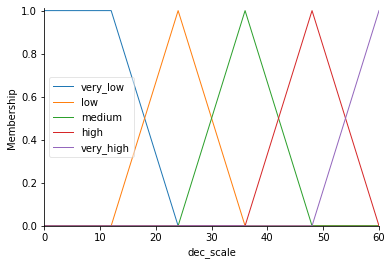

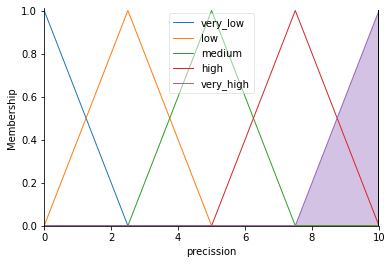

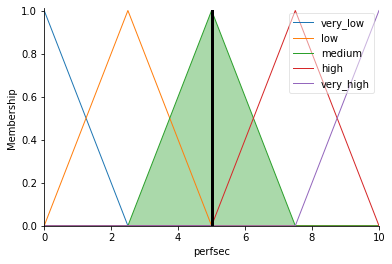

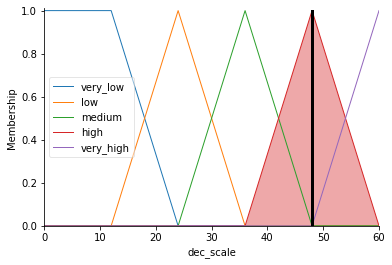

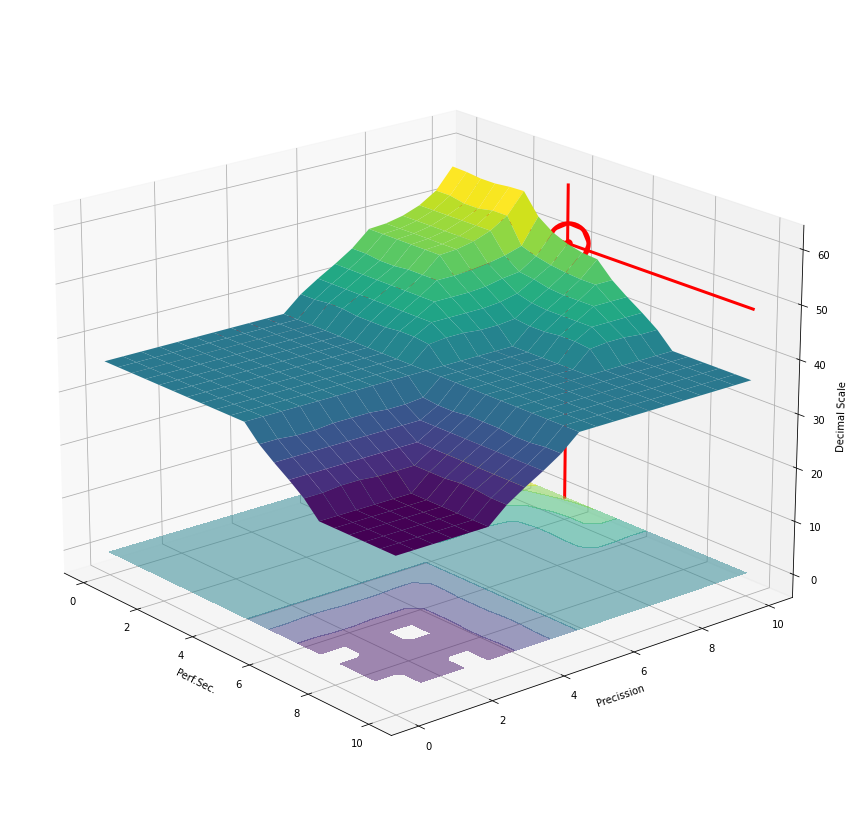

In [ ]:
class DecScaleFL(BaseFL):
    """
    The decimal scale is the amount of bits we reserve for the real scale.
    This is influenced by two factors:
        - The precision we want to achieve, because it involves the real precision.
        - The mult depth, since, the bigger the mult depth, the lower the bound can be set.
        - The performance is also influenced by the real scale. The better performance, the lower dec_scale.
        - The security is also influenced. The larger dec_scale, the lower security.
    """
    def __init__(self):
        super().__init__()
        
    def generate_antecedent(self):
        self.precision = BaseFL.get_precision()
        self.perfsec = BaseFL.get_perfsec()
    
    def generate_consequent(self):
        self.dec_scale = BaseFL.generate_dec_scale('consequent')
        
    def generate_rules(self):
        self.rules = []
        # Only in cases with all conditions, we consider feasible to have very_low real scale.
        # So having security, performance and mult_depth very_high abd very_low precision we can consider a very_low dec_scale
        self.rules.append(ctrl.Rule(antecedent=(self.precision['very_low'] | 
                                                self.perfsec['very_high']), 
                                    consequent=self.dec_scale['very_low'], 
                                    label='dec_scale very_low'))
        # if either mult_depth or performance or security are high or performance is low, we can have low dec_scale
        self.rules.append(ctrl.Rule(antecedent=(self.precision['low'] | 
                                                self.perfsec['high']), 
                                    consequent=self.dec_scale['low'], 
                                    label='dec_scale low'))
        # if either mult_depth or performance or security performance are medium, we can have medium dec_scale
        self.rules.append(ctrl.Rule(antecedent=(self.precision['medium'] |
                                                self.perfsec['medium']), 
                                    consequent=self.dec_scale['medium'], 
                                    label='dec_scale medium'))
        # if precision is low and mult depth is low then we get dec_scale low
        self.rules.append(ctrl.Rule(antecedent=(self.precision['high'] |
                                                self.perfsec['low']), 
                                    consequent=self.dec_scale['high'], 
                                    label='dec_scale high'))
        # Only in cases with all conditions, we consider feasible to have very_low real scale.
        # So having security, performance and mult_depth very_high abd very_low precision we can consider a very_low dec_scale
        self.rules.append(ctrl.Rule(antecedent=(self.precision['very_high'] | 
                                                self.perfsec['very_low']), 
                                    consequent=self.dec_scale['very_high'], 
                                    label='dec_scale very_high'))
    def generate_rules(self):
        self.rules = []
        
        rules = [
            ('very_high', 'very_high', 'medium'),
            ('very_high', 'high', 'medium'),
            ('very_high', 'medium', 'high'),
            ('very_high', 'low', 'very_high'),
            ('very_high', 'very_low', 'very_high'),
            ('high', 'very_high', 'medium'),
            ('high', 'high', 'medium'),
            ('high', 'medium', 'medium'),
            ('high', 'low', 'high'),
            ('high', 'very_low', 'high'),
            ('medium', 'very_high', 'medium'),
            ('medium', 'high', 'medium'),
            ('medium', 'medium', 'medium'),
            ('medium', 'low', 'medium'),
            ('medium', 'very_low', 'medium'),
            ('low', 'very_high', 'low'),
            ('low', 'high', 'low'),
            ('low', 'medium', 'medium'),
            ('low', 'low', 'medium'),
            ('low', 'very_low', 'medium'),
            ('very_low', 'very_high', 'low'),
            ('very_low', 'high', 'low'),
            ('very_low', 'medium', 'medium'),
            ('very_low', 'low', 'medium'),
            ('very_low', 'very_low', 'medium'),
            ]
        for a, b, c in rules:
            self.rules.append(ctrl.Rule(antecedent=(self.precision[a] & self.perfsec[b]), 
                                                    consequent=self.dec_scale[c], 
                                                    label='[Rule] Precission %s Perfsec %s -> Dec Scale %s'%(a, b, c)))
        
      
    
    def generate_ctrl_system(self):
        self.ctrl_sys = ctrl.ControlSystem(self.rules)
        return self.ctrl_sys
    
    def simulate(self, precision, performance, security, plot=False):
        sim = ctrl.ControlSystemSimulation(self.ctrl_sys) # , flush_after_run=21 * 21 + 1)
        #perfsec = (performance + security) * 0.5
        perfsec = max(performance, security)
        sim.input['perfsec'] = perfsec
        sim.input['precision'] = precision
        sim.compute()
    

        if plot:
            self.precision.view(sim=sim)
            self.perfsec.view(sim=sim)
            self.dec_scale.view(sim=sim)
        print("For Precission[%d], Performance[%d] and Security[%d] we get: %0.2f" %(precision, performance, security, sim.output['dec_scale']))
        return np.round(sim.output['dec_scale'])

        
        
    def plot_meshgrid(self, precision=None, performance=None, security=None):
        
        # We can simulate at higher resolution with full accuracy
        size_x, size_y = int(self.perfsec.universe[-1]), int(self.precision.universe[-1])
        sim = ctrl.ControlSystemSimulation(self.ctrl_sys, flush_after_run= (size_x * size_y) + 1)
        upsampled_x = self.perfsec.universe
        upsampled_y = self.precision.universe
        x, y = np.meshgrid(upsampled_y, upsampled_x)
        z = np.zeros_like(x)

        # Loop through the system 21*21 times to collect the control surface
        for i in range(0, len(upsampled_x)):
            for j in range(0, len(upsampled_y)):
                    sim.input['perfsec'] = x[i, j]
                    sim.input['precision'] = y[i, j]
                    sim.compute()
                    z[i, j] = sim.output['dec_scale']
                #dec_scale.view(sim=sim)
                #print(x[i, j], y[i, j], z[i, j])

        # Plot the result in pretty 3D with alpha blending
        import matplotlib.pyplot as plt
        from mpl_toolkits.mplot3d import Axes3D  # Required for 3D plotting

        fig = plt.figure(figsize=(8, 8))
        ax = fig.add_subplot(111, projection='3d')

        surf = ax.plot_surface(x, y, z, rstride=1, cstride=1, cmap='viridis',
                               linewidth=0.4, antialiased=True)
        
        
        perfsec = None
        
        if precision is None or performance is None or security is None:
            precision = 10
            performance = 4
            security = 4
            perfsec = 4
        else:
            #perfsec = (performance + security) * 0.5
            perfsec = max(performance, security)
    
        res = self.simulate(precision, performance, security)
        
        lines = np.arange(0, min(size_x, size_y), 1)
        
        lines_x = np.linspace(0, upsampled_y[-1], num=50)
        lines_y = np.linspace(0, upsampled_x[-1], num=50)
        lines_z = np.linspace(0, self.dec_scale.universe[-1], num=50)
        
        ones = np.ones_like(lines)
        ones_x = np.ones_like(lines_x)
        ones_y = np.ones_like(lines_y)
        ones_z = np.ones_like(lines_z)
        
        end = ones * lines[-1]
        end_x = ones_x * lines_x[-1]
        end_y = ones_y * lines_y[-1]
        end_z = ones_z * lines_z[-1]
        
        zeros = np.zeros_like(lines)
        zeros_x = np.zeros_like(lines_x)
        zeros_y = np.zeros_like(lines_y)
        zeros_z = np.zeros_like(lines_z)
        
        ax.scatter(perfsec, precision, res, color='red', linewidth=4) 
        ax.scatter(perfsec, precision, res, color='red', linewidth=40)
        ax.plot(perfsec * ones_x, precision * ones_y, lines_z, color='red', linewidth=3)
        ax.plot(perfsec * ones_x, lines_y, res * ones_z, color='red', linewidth=3)
        ax.plot(lines_x, precision * ones_y, res * ones_z, color='red', linewidth=3)
        
        
        
        ax.set_xlabel('Perf.Sec.')#, fontsize=20)
        ax.set_ylabel('Precission')
        ax.set_zlabel('Decimal Scale')
        cset = ax.contourf(x, y, z, zdir='z', offset=0, cmap='viridis', alpha=0.5)
        #cset = ax.contourf(x, y, z, zdir='x', offset=0, cmap='viridis', alpha=0.5)
        #cset = ax.contourf(x, y, z, zdir='y', offset=20, cmap='viridis', alpha=0.5)
        ax.view_init(20, 320)
        
dsfl = DecScaleFL()
#rsfl = RealScaleFL()
dsfl.simulate(precision=10, performance=5, security=5, plot=True)
dsfl.simulate(precision=10, performance=0, security=1, plot=False)
dsfl.simulate(precision=6, performance=7, security=8, plot=False)
dsfl.simulate(precision=0, performance=10, security=0, plot=False)
# precision, mult_depth, performance, security
#rsfl.simulate(1, 16, 9, 9)
dsfl.plot_meshgrid()


In [7]:
for precision_value in ['very_high', 'high', 'medium', 'low', 'very_low']:
    for perfsec_value in ['very_high', 'high', 'medium', 'low', 'very_low']:
        consequent_activation = 'medium'
        print("('{0}', '{1}', '{2}'),".format(precision_value, perfsec_value, consequent_activation))

('very_high', 'very_high', 'medium'),
('very_high', 'high', 'medium'),
('very_high', 'medium', 'medium'),
('very_high', 'low', 'medium'),
('very_high', 'very_low', 'medium'),
('high', 'very_high', 'medium'),
('high', 'high', 'medium'),
('high', 'medium', 'medium'),
('high', 'low', 'medium'),
('high', 'very_low', 'medium'),
('medium', 'very_high', 'medium'),
('medium', 'high', 'medium'),
('medium', 'medium', 'medium'),
('medium', 'low', 'medium'),
('medium', 'very_low', 'medium'),
('low', 'very_high', 'medium'),
('low', 'high', 'medium'),
('low', 'medium', 'medium'),
('low', 'low', 'medium'),
('low', 'very_low', 'medium'),
('very_low', 'very_high', 'medium'),
('very_low', 'high', 'medium'),
('very_low', 'medium', 'medium'),
('very_low', 'low', 'medium'),
('very_low', 'very_low', 'medium'),


For Dec Scale[32] and Mult. Depth[32] we get: 31.64
For Dec Scale[40] and Mult. Depth[25] we get: 36.00


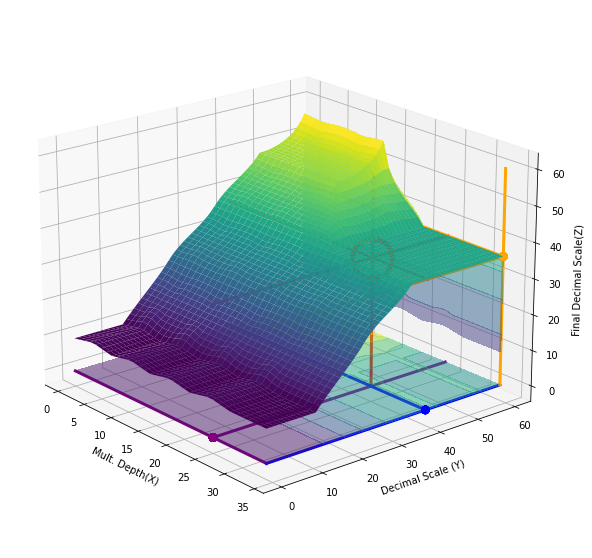

In [8]:
%matplotlib inline

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d  

class DecScaleFL2(BaseFL):
    """
    The real scale is the amount of bits we reserve for the real scale.
    This is influenced by two factors:
        - The precision we want to achieve, because it involves the real precision.
        - The mult depth, since, the bigger the mult depth, the lower the bound can be set.
        - The performance is also influenced by the real scale. The better performance, the lower real_scale.
        - The security is also influenced. The larger real_scale, the lower security.
    """
    def __init__(self):
        super().__init__()
        
    def generate_antecedent(self):
        self.dec_scale = BaseFL.generate_dec_scale('antecedent')
        self.mult_depth = BaseFL.get_mult_depth()
    
    def generate_consequent(self):
        self.dec_scale_final = BaseFL.generate_dec_scale('consequent')
        
    def generate_rules(self):
        self.rules = []
        

        # For mult_depths of low and very_low we preserve the choice made in the last section, we don't modify them
        for mult_depth_condition in ['very_low', 'low']:
            for dec_scale_condition in ['very_low', 'low', 'medium', 'high', 'very_high']:
                self.rules.append(ctrl.Rule(antecedent=(self.dec_scale[dec_scale_condition] & self.mult_depth[mult_depth_condition]), 
                                            consequent=self.dec_scale_final[dec_scale_condition], 
                                            label='if dec_scale %s and mult_depth is %s we preserve choice' % (dec_scale_condition, mult_depth_condition)))
        
        # Only in cases with all conditions, we consider feasible to have very_low dec scale.
        # So having security, performance and mult_depth very_high abd very_low precision we can consider a very_low dec_scale
        for mult_depth_condition in ['medium']:
            for dec_scale_condition in ['very_low', 'low', 'medium', 'high', 'very_high']:
                self.rules.append(ctrl.Rule(antecedent=(self.dec_scale[dec_scale_condition] & self.mult_depth[mult_depth_condition]), 
                                            consequent=self.dec_scale_final[dec_scale_condition], 
                                            label='if dec_scale %s and mult_depth is %s we preserve choice' % (dec_scale_condition, mult_depth_condition)))
        

        ## HIGH RULES

        self.rules.append(ctrl.Rule(antecedent=(self.dec_scale['very_low'] & self.mult_depth['high']), 
                                    consequent=self.dec_scale_final['very_low'], 
                                    label='if dec_scale very_low and mult_depth is high we preserve choice'))
   
        self.rules.append(ctrl.Rule(antecedent=(self.dec_scale['low'] & self.mult_depth['high']), 
                                    consequent=self.dec_scale_final['low'], 
                                    label='if dec_scale low and mult_depth is high we preserve choice'))
        
        self.rules.append(ctrl.Rule(antecedent=(self.dec_scale['medium'] & self.mult_depth['high']), 
                                    consequent=self.dec_scale_final['medium'], 
                                    label='if dec_scale medium and mult_depth is high we preserve choice'))
   
        self.rules.append(ctrl.Rule(antecedent=(self.dec_scale['high'] & self.mult_depth['high']), 
                                    consequent=self.dec_scale_final['medium'], 
                                    label='if dec_scale high and mult_depth is high we preserve choice'))
    
        self.rules.append(ctrl.Rule(antecedent=(self.dec_scale['very_high'] & self.mult_depth['high']), 
                                    consequent=self.dec_scale_final['medium'], 
                                    label='if dec_scale very_high and mult_depth is high we preserve choice'))
       
        ## VERY HIGH RULES
    
    
        self.rules.append(ctrl.Rule(antecedent=(self.dec_scale['very_low'] & self.mult_depth['very_high']), 
                                    consequent=self.dec_scale_final['very_low'], 
                                    label='if dec_scale very_low and mult_depth is very_high we preserve choice'))
   
        self.rules.append(ctrl.Rule(antecedent=(self.dec_scale['low'] & self.mult_depth['very_high']), 
                                    consequent=self.dec_scale_final['low'], 
                                    label='if dec_scale low and mult_depth is very_high we preserve choice'))
        
        self.rules.append(ctrl.Rule(antecedent=(self.dec_scale['medium'] & self.mult_depth['very_high']), 
                                    consequent=self.dec_scale_final['medium'], 
                                    label='if dec_scale medium and mult_depth is very_high we preserve choice'))
   
        self.rules.append(ctrl.Rule(antecedent=(self.dec_scale['high'] & self.mult_depth['very_high']), 
                                    consequent=self.dec_scale_final['medium'], 
                                    label='if dec_scale high and mult_depth is very_high we preserve choice'))
    
        self.rules.append(ctrl.Rule(antecedent=(self.dec_scale['very_high'] & self.mult_depth['very_high']), 
                                    consequent=self.dec_scale_final['medium'], 
                                    label='if dec_scale very_high and mult_depth is very_high we preserve choice'))
        
                               
    def generate_ctrl_system(self):
        self.ctrl_sys = ctrl.ControlSystem(self.rules)
        return self.ctrl_sys
    
    def simulate(self, dec_scale, mult_depth, plot=False):
        sim = ctrl.ControlSystemSimulation(self.ctrl_sys , flush_after_run=21 * 21 + 1)
        sim.input['dec_scale'] = dec_scale
        sim.input['mult_depth'] = mult_depth
        sim.compute()
    

        if plot:
            self.mult_depth.view(sim=sim)
            self.dec_scale.view(sim=sim)
            self.dec_scale_final.view(sim=sim)
        print("For Dec Scale[%d] and Mult. Depth[%d] we get: %0.2f" %(dec_scale, mult_depth, sim.output['dec_scale']))
        return np.round(sim.output['dec_scale'])

        
        
    def plot_meshgrid(self, dec_scale=None, mult_depth=None):
        size_x, size_y = int(self.dec_scale.universe[-1]), int(self.mult_depth.universe[-1])
        sim = ctrl.ControlSystemSimulation(self.ctrl_sys, flush_after_run= (size_x * size_y + 1))
        # We can simulate at higher resolution with full accuracy
        upsampled_x = self.dec_scale.universe
        upsampled_y = self.mult_depth.universe
        x, y = np.meshgrid(upsampled_y, upsampled_x)
        
        z = np.zeros_like(x)

        # Loop through the system 21*21 times to collect the control surface
        for i in range(0, len(upsampled_x)):
            for j in range(0, len(upsampled_y)):
                    sim.input['mult_depth'] = x[i, j]
                    sim.input['dec_scale'] = y[i, j]
                    
                    
                    
                    
                    sim.compute()
                    z[i, j] = sim.output['dec_scale']
                    #print(x[j, i], y[j, i], z[j, i])
                #dec_scale.view(sim=sim)
                #print(x[i, j], y[i, j], z[i, j])

        # Plot the result in pretty 3D with alpha blending
        import matplotlib.pyplot as plt
        from mpl_toolkits.mplot3d import Axes3D  # Required for 3D plotting

        fig = plt.figure(figsize=(10, 10))
        ax = fig.add_subplot(111, projection='3d')

        surf = ax.plot_surface(x, y, z, rstride=1, cstride=1, cmap='viridis',
                               linewidth=8, antialiased=True)

        cset = ax.contourf(x, y, z, zdir='z', offset=0, cmap='viridis', alpha=0.5)
        #cset = ax.contourf(x, y, z, zdir='x', offset=0, cmap='viridis', alpha=0.5)
        cset = ax.contourf(x, y, z, zdir='y', offset=upsampled_x[-1], cmap='viridis', alpha=0.5)
        
        
        
        
        ax.set_xlabel('Mult. Depth(X)')#, fontsize=20)
        ax.set_ylabel('Decimal Scale (Y)')
        ax.set_zlabel('Final Decimal Scale(Z)')
        
        if dec_scale is None or mult_depth is None:
            md, sc= 16, 16
        else:
            md, sc = mult_depth, dec_scale
        
        res = self.simulate(dec_scale=sc, mult_depth=md)
        
        
        lines = np.arange(0, min(size_x, size_y), 1)
        
        lines_x = np.linspace(0, upsampled_y[-1], num=50)
        lines_y = np.linspace(0, upsampled_x[-1], num=50)
        lines_z = np.linspace(0, self.dec_scale_final.universe[-1], num=50)
        
        ones = np.ones_like(lines)
        ones_x = np.ones_like(lines_x)
        ones_y = np.ones_like(lines_y)
        ones_z = np.ones_like(lines_z)
        
        end = ones * lines[-1]
        end_x = ones_x * lines_x[-1]
        end_y = ones_y * lines_y[-1]
        end_z = ones_z * lines_z[-1]
        
        zeros = np.zeros_like(lines)
        zeros_x = np.zeros_like(lines_x)
        zeros_y = np.zeros_like(lines_y)
        zeros_z = np.zeros_like(lines_z)
            
        ax.scatter(md, sc, res , color='red', linewidth=40)
        ax.plot(md * ones_x, sc * ones_y, lines_z, color='red', linewidth=3)
        ax.plot(md * ones_x, lines_y, res * ones_z, color='red', linewidth=3)
        ax.plot(lines_x, sc * ones_y, res * ones_z, color='red', linewidth=3)

        
        ax.scatter(md, zeros_y, 0, color='purple', linewidth=4)
        ax.plot(lines_x, zeros_y, zeros_z, color='purple', linewidth=3)
        ax.plot(md * ones_x, lines_y, zeros_z, color='purple', linewidth=3)
        #ax.plot(end, lines, zeros, color='purple', linewidth=3)
        #ax.plot(end, end, lines, color='purple', linewidth=3)
        
        ax.scatter(end_x, sc, 0, color='blue', linewidth=4)
        ax.plot(end_x, lines_y, zeros_z, color='blue', linewidth=3)
        ax.plot(lines_x, sc * ones_y, zeros_z, color='blue', linewidth=3)
        #ax.plot(zeros, lines, zeros, color='blue', linewidth=3)
        #ax.plot(zeros, lines, zeros, color='blue', linewidth=3)
        
        ax.scatter(end_x, end_y, res, color='orange', linewidth=4)
        ax.plot(end_x, end_y, lines_z, color='orange', linewidth=3)
        ax.plot(end_x, lines_y, res, color='orange', linewidth=3)
        ax.plot(lines_x, end_y, res, color='orange', linewidth=3)
        #ax.scatter(md, sc, res, color='black', linewidth=4)
        #ax.scatter(40, sc, z[md, sc], color='red')
        #ax.scatter(md, 40, z[md, sc], color='red') 
        #ax.scatter(md, sc, 40, color='red') 
        ax.view_init(20, 320)
        #ax.view_init(0, 90)
        
rsfl = DecScaleFL2()
rsfl.simulate(dec_scale = 32, mult_depth=32, plot=False)
# precision, mult_depth, performance, security
#rsfl.simulate(1, 16, 9, 9)
rsfl.plot_meshgrid(dec_scale = 40, mult_depth=25)


In [9]:
class ScaleFL(object):
    def __init__(self):
        
        self.rsfl = RealScaleFL()
        self.rsfl2 = RealScaleFL2()
        
        self.dsfl = DecScaleFL()
        self.dsfl2 = DecScaleFL2()
    
    def simulate(self, precision, performance, security, mult_depth, plot=False):
        
        dec_scale = self.dsfl.simulate(precision, performance, security, plot)
        real_scale = self.rsfl.simulate(precision, performance, security, plot)
        real_scale_final = self.rsfl2.simulate(real_scale, mult_depth)
        dec_scale_final = self.dsfl2.simulate(dec_scale, mult_depth)
        mid = int(dec_scale_final - real_scale_final)
        res = [dec_scale_final] + [mid] * (mult_depth -2) + [dec_scale_final]
        print("RES: ", [dec_scale_final] + [mid] * (mult_depth -2) + [dec_scale_final], np.array(res).sum())
        if plot == True:
            self.rsfl.plot_meshgrid(precision, performance, security)
            self.dsfl.plot_meshgrid(precision, performance, security)
            self.rsfl2.plot_meshgrid(real_scale, mult_depth)
            self.dsfl2.plot_meshgrid(dec_scale, mult_depth)
        
        return dec_scale_final, real_scale_final

def compare_threshold(pr, pe, se, md, dec_scale, real_scale):
    
    sfl = ScaleFL()
    print("-" * 30)
    dec_scale2, real_scale2 = sfl.simulate(precision=pr, performance=pe, security=se, mult_depth=md)  
    print("DIFF D[%d] R[%d]" % (dec_scale - dec_scale2, real_scale - real_scale2))
    print("-" * 30)
compare_threshold(10, 0, 0, 5, 55, 25)
compare_threshold(10, 0, 0, 10, 50, 20)
compare_threshold(10, 0, 0, 15, 45, 20)
compare_threshold(10, 0, 0, 20, 40, 20)
compare_threshold(10, 0, 0, 28, 30, 15)
compare_threshold(10, 5, 5, 20, 35, 15)
compare_threshold(5, 5, 5, 20, 30, 15)
compare_threshold(10, 5, 5, 20, 35, 15)
compare_threshold(0, 10, 5, 20, 20, 10)
compare_threshold(0, 10, 5, 20, 20, 10)

------------------------------
For Precission[10], Performance[0] and Security[0] we get: 56.00
For Precission[10], Performance[0] and Security[0] we get: 27.50
For Real Scale[28] and Mult. Depth[5] we get: 24.55
For Dec Scale[56] and Mult. Depth[5] we get: 50.67
RES:  [51.0, 26, 26, 26, 51.0] 180.0
DIFF D[4] R[0]
------------------------------
------------------------------
For Precission[10], Performance[0] and Security[0] we get: 56.00
For Precission[10], Performance[0] and Security[0] we get: 27.50
For Real Scale[28] and Mult. Depth[10] we get: 24.24
For Dec Scale[56] and Mult. Depth[10] we get: 50.32
RES:  [50.0, 26, 26, 26, 26, 26, 26, 26, 26, 50.0] 308.0
DIFF D[0] R[-4]
------------------------------
------------------------------
For Precission[10], Performance[0] and Security[0] we get: 56.00
For Precission[10], Performance[0] and Security[0] we get: 27.50
For Real Scale[28] and Mult. Depth[15] we get: 22.49
For Dec Scale[56] and Mult. Depth[15] we get: 47.59
RES:  [48.0, 26, 

For Performance[10] and Security[0] we get: 0.08
For Performance[7] and Security[7] we get: 0.50
0.49999999999999994


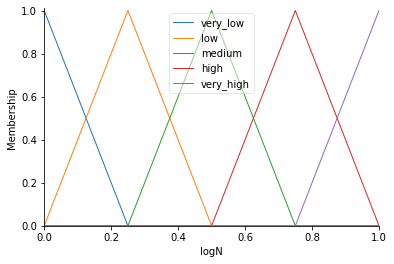

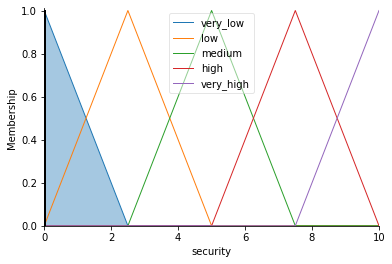

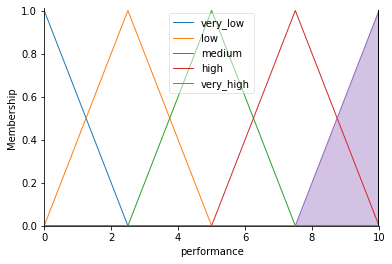

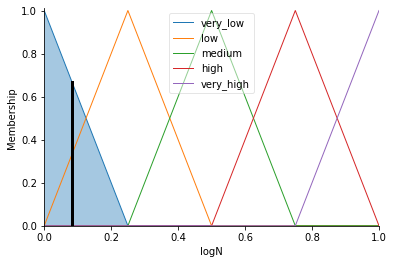

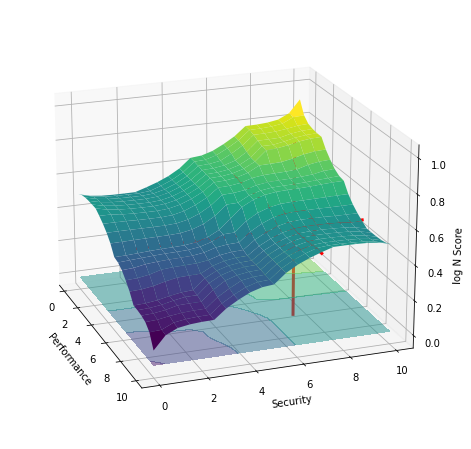

In [24]:
   
class LogNFL(BaseFL):
    """
    The real scale is the amount of bits we reserve for the real scale.
    This is influenced by two factors:
        - The security we want to achieve, because it involves the real security.
        - The mult depth, since, the bigger the mult depth, the lower the bound can be set.
        - The performance is also influenced by the real scale. The better performance, the lower logN.
        - The security is also influenced. The larger logN, the lower security.
    """
    def __init__(self):
        super().__init__()
        
    def generate_antecedent(self):
        self.performance = BaseFL.get_performance()
        self.security = BaseFL.get_security()
    
    def generate_consequent(self):
        self.logN = BaseFL.generate_logN('consequent')
        #self.lambda = BaseFL.generate_lambda('consequent')
        
    def generate_rules(self):
        self.rules = []
        # Only in cases with all conditions, we consider feasible to have very_low real scale.
        # So having security, performance and mult_depth very_high abd very_low security we can consider a very_low logN
        self.rules.append(ctrl.Rule(antecedent=(self.security['very_low'] | 
                                                self.performance['very_high']), 
                                    consequent=self.logN['very_low'], 
                                    label='logN very_low'))
        # if either mult_depth or performance or security are high or performance is low, we can have low logN
        self.rules.append(ctrl.Rule(antecedent=(self.security['low'] | 
                                                self.performance['high']), 
                                    consequent=self.logN['low'], 
                                    label='logN low'))
        # if either mult_depth or performance or security performance are medium, we can have medium logN
        self.rules.append(ctrl.Rule(antecedent=(self.security['medium'] |
                                                self.performance['medium']), 
                                    consequent=self.logN['medium'], 
                                    label='logN medium'))
        # if security is low and mult depth is low then we get logN low
        self.rules.append(ctrl.Rule(antecedent=(self.security['high'] |
                                                self.performance['low']), 
                                    consequent=self.logN['high'], 
                                    label='logN high'))
        # Only in cases with all conditions, we consider feasible to have very_low real scale.
        # So having security, performance and mult_depth very_high abd very_low security we can consider a very_low logN
        self.rules.append(ctrl.Rule(antecedent=(self.security['very_high'] | 
                                                self.performance['very_low']), 
                                    consequent=self.logN['very_high'], 
                                    label='logN very_high'))
      
    
    def generate_ctrl_system(self):
        self.ctrl_sys = ctrl.ControlSystem(self.rules)
        return self.ctrl_sys
        
    def simulate(self, performance, security, plot=False):
        sim = ctrl.ControlSystemSimulation(self.ctrl_sys) # , flush_after_run=21 * 21 + 1)
        #performance = (performance + security) * 0.5
        sim.input['security'] = security
        sim.input['performance'] = performance
        sim.compute()
    

        if plot:
            self.security.view(sim=sim)
            self.performance.view(sim=sim)
            self.logN.view(sim=sim)
        print("For Performance[%d] and Security[%d] we get: %0.2f" %(performance, security, sim.output['logN']))
        return sim.output['logN']

        
        
    def plot_meshgrid(self, security=None, performance=None):
        
        # We can simulate at higher resolution with full accuracy
        size_x, size_y = int(self.performance.universe[-1]), int(self.security.universe[-1])
        sim = ctrl.ControlSystemSimulation(self.ctrl_sys, flush_after_run= (size_x * size_y) + 1)
        upsampled_x = self.performance.universe
        upsampled_y = self.security.universe
        x, y = np.meshgrid(upsampled_y, upsampled_x)
        z = np.zeros_like(x)

        # Loop through the system 21*21 times to collect the control surface
        for i in range(0, len(upsampled_x)):
            for j in range(0, len(upsampled_y)):
                    sim.input['performance'] = x[i, j]
                    sim.input['security'] = y[i, j]
                    sim.compute()
                    z[i, j] = sim.output['logN']
                #dec_scale.view(sim=sim)
                #print(x[i, j], y[i, j], z[i, j])

        # Plot the result in pretty 3D with alpha blending
        import matplotlib.pyplot as plt
        from mpl_toolkits.mplot3d import Axes3D  # Required for 3D plotting

        fig = plt.figure(figsize=(8, 8))
        ax = fig.add_subplot(111, projection='3d')

        surf = ax.plot_surface(x, y, z, rstride=1, cstride=1, cmap='viridis',
                               linewidth=0.4, antialiased=True)
        
        
        
        if security is None or performance is None:
            security = 10
            performance = 4
        else:
            #performance = (performance + security) * 0.5
            performance = max(performance, security)
        
    
        res = self.simulate(performance=performance, security=security)
        
        lines = np.arange(0, min(size_x, size_y), 1)
        
        lines_x = np.linspace(0, upsampled_y[-1], num=50)
        lines_y = np.linspace(0, upsampled_x[-1], num=50)
        lines_z = np.linspace(0, self.logN.universe[-1], num=50)
        
        ones = np.ones_like(lines)
        ones_x = np.ones_like(lines_x)
        ones_y = np.ones_like(lines_y)
        ones_z = np.ones_like(lines_z)
        
        end = ones * lines[-1]
        end_x = ones_x * lines_x[-1]
        end_y = ones_y * lines_y[-1]
        end_z = ones_z * lines_z[-1]
        
        zeros = np.zeros_like(lines)
        zeros_x = np.zeros_like(lines_x)
        zeros_y = np.zeros_like(lines_y)
        zeros_z = np.zeros_like(lines_z)
        
        print(res)
        ax.scatter(performance, security, res, color='red', linewidth=4) 
        ax.scatter(performance, security, res, color='red', linewidth=40)
        ax.plot(performance * ones_x, security * ones_y, lines_z, color='red', linewidth=3)
        ax.plot(performance * ones_x, lines_y, res * ones_z, color='red', linewidth=3)
        ax.plot(lines_x, security * ones_y, res * ones_z, color='red', linewidth=3)
        
        
        
        ax.set_xlabel('Performance')#, fontsize=20)
        ax.set_ylabel('Security')
        ax.set_zlabel('log N Score')
        cset = ax.contourf(x, y, z, zdir='z', offset=0, cmap='viridis', alpha=0.5)
        #cset = ax.contourf(x, y, z, zdir='x', offset=0, cmap='viridis', alpha=0.5)
        #cset = ax.contourf(x, y, z, zdir='y', offset=20, cmap='viridis', alpha=0.5)
        ax.view_init(20, 340)
        
lnfl = LogNFL()
lnfl.simulate(security=0, performance=10, plot=True)
lnfl.plot_meshgrid(security = 7, performance = 5)


For Performance[10] and Security[0] we get: 0.08
For Performance[7] and Security[7] we get: 0.50
0.49999999999999994


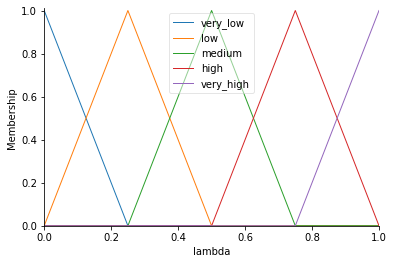

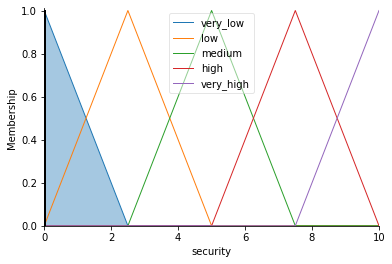

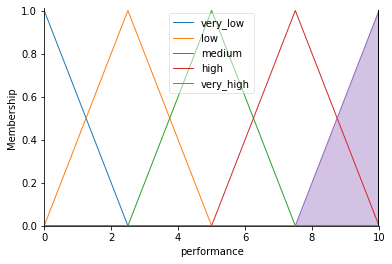

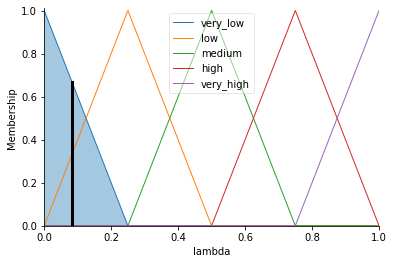

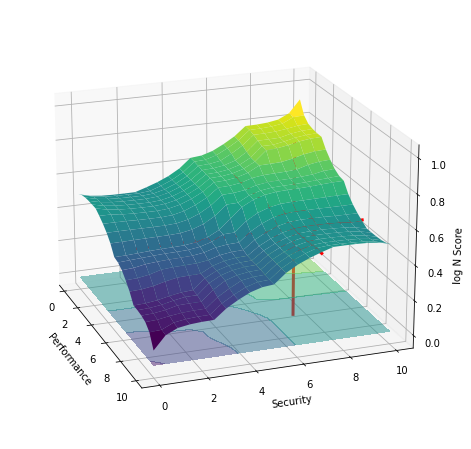

In [28]:
class LambdaFL(BaseFL):
    """
    The real scale is the amount of bits we reserve for the real scale.
    This is influenced by two factors:
        - The security we want to achieve, because it involves the real security.
        - The mult depth, since, the bigger the mult depth, the lower the bound can be set.
        - The performance is also influenced by the real scale. The better performance, the lower lambda.
        - The security is also influenced. The larger lambda, the lower security.
    """
    def __init__(self):
        super().__init__()
        
    def generate_antecedent(self):
        self.performance = BaseFL.get_performance()
        self.security = BaseFL.get_security()
    
    def generate_consequent(self):
        self.lambd = BaseFL.generate_lambda('consequent')
        #self.lambd = BaseFL.generate_lambda('consequent')
        
    def generate_rules(self):
        self.rules = []
        # Only in cases with all conditions, we consider feasible to have very_low real scale.
        # So having security, performance and mult_depth very_high abd very_low security we can consider a very_low lambda
        self.rules.append(ctrl.Rule(antecedent=(self.security['very_low'] | 
                                                self.performance['very_high']), 
                                    consequent=self.lambd['very_low'], 
                                    label='lambda very_low'))
        # if either mult_depth or performance or security are high or performance is low, we can have low lambda
        self.rules.append(ctrl.Rule(antecedent=(self.security['low'] | 
                                                self.performance['high']), 
                                    consequent=self.lambd['low'], 
                                    label='lambda low'))
        # if either mult_depth or performance or security performance are medium, we can have medium lambda
        self.rules.append(ctrl.Rule(antecedent=(self.security['medium'] |
                                                self.performance['medium']), 
                                    consequent=self.lambd['medium'], 
                                    label='lambda medium'))
        # if security is low and mult depth is low then we get lambda low
        self.rules.append(ctrl.Rule(antecedent=(self.security['high'] |
                                                self.performance['low']), 
                                    consequent=self.lambd['high'], 
                                    label='lambda high'))
        # Only in cases with all conditions, we consider feasible to have very_low real scale.
        # So having security, performance and mult_depth very_high abd very_low security we can consider a very_low lambda
        self.rules.append(ctrl.Rule(antecedent=(self.security['very_high'] | 
                                                self.performance['very_low']), 
                                    consequent=self.lambd['very_high'], 
                                    label='lambda very_high'))
      
    
    def generate_ctrl_system(self):
        self.ctrl_sys = ctrl.ControlSystem(self.rules)
        return self.ctrl_sys
        
    def simulate(self, performance, security, plot=False):
        sim = ctrl.ControlSystemSimulation(self.ctrl_sys) # , flush_after_run=21 * 21 + 1)
        #performance = (performance + security) * 0.5
        sim.input['security'] = security
        sim.input['performance'] = performance
        sim.compute()
    

        if plot:
            self.security.view(sim=sim)
            self.performance.view(sim=sim)
            self.lambd.view(sim=sim)
        print("For Performance[%d] and Security[%d] we get: %0.2f" %(performance, security, sim.output['lambda']))
        return sim.output['lambda']

        
        
    def plot_meshgrid(self, security=None, performance=None):
        
        # We can simulate at higher resolution with full accuracy
        size_x, size_y = int(self.performance.universe[-1]), int(self.security.universe[-1])
        sim = ctrl.ControlSystemSimulation(self.ctrl_sys, flush_after_run= (size_x * size_y) + 1)
        upsampled_x = self.performance.universe
        upsampled_y = self.security.universe
        x, y = np.meshgrid(upsampled_y, upsampled_x)
        z = np.zeros_like(x)

        # Loop through the system 21*21 times to collect the control surface
        for i in range(0, len(upsampled_x)):
            for j in range(0, len(upsampled_y)):
                    sim.input['performance'] = x[i, j]
                    sim.input['security'] = y[i, j]
                    sim.compute()
                    z[i, j] = sim.output['lambda']
                #dec_scale.view(sim=sim)
                #print(x[i, j], y[i, j], z[i, j])

        # Plot the result in pretty 3D with alpha blending
        import matplotlib.pyplot as plt
        from mpl_toolkits.mplot3d import Axes3D  # Required for 3D plotting

        fig = plt.figure(figsize=(8, 8))
        ax = fig.add_subplot(111, projection='3d')

        surf = ax.plot_surface(x, y, z, rstride=1, cstride=1, cmap='viridis',
                               linewidth=0.4, antialiased=True)
        
        
        
        if security is None or performance is None:
            security = 10
            performance = 4
        else:
            #performance = (performance + security) * 0.5
            performance = max(performance, security)
        
    
        res = self.simulate(performance=performance, security=security)
        
        lines = np.arange(0, min(size_x, size_y), 1)
        
        lines_x = np.linspace(0, upsampled_y[-1], num=50)
        lines_y = np.linspace(0, upsampled_x[-1], num=50)
        lines_z = np.linspace(0, self.lambd.universe[-1], num=50)
        
        ones = np.ones_like(lines)
        ones_x = np.ones_like(lines_x)
        ones_y = np.ones_like(lines_y)
        ones_z = np.ones_like(lines_z)
        
        end = ones * lines[-1]
        end_x = ones_x * lines_x[-1]
        end_y = ones_y * lines_y[-1]
        end_z = ones_z * lines_z[-1]
        
        zeros = np.zeros_like(lines)
        zeros_x = np.zeros_like(lines_x)
        zeros_y = np.zeros_like(lines_y)
        zeros_z = np.zeros_like(lines_z)
        
        print(res)
        ax.scatter(performance, security, res, color='red', linewidth=4) 
        ax.scatter(performance, security, res, color='red', linewidth=40)
        ax.plot(performance * ones_x, security * ones_y, lines_z, color='red', linewidth=3)
        ax.plot(performance * ones_x, lines_y, res * ones_z, color='red', linewidth=3)
        ax.plot(lines_x, security * ones_y, res * ones_z, color='red', linewidth=3)
        
        
        
        ax.set_xlabel('Performance')#, fontsize=20)
        ax.set_ylabel('Security')
        ax.set_zlabel('log N Score')
        cset = ax.contourf(x, y, z, zdir='z', offset=0, cmap='viridis', alpha=0.5)
        #cset = ax.contourf(x, y, z, zdir='x', offset=0, cmap='viridis', alpha=0.5)
        #cset = ax.contourf(x, y, z, zdir='y', offset=20, cmap='viridis', alpha=0.5)
        ax.view_init(20, 340)
        
lnfl = LambdaFL()
lnfl.simulate(security=0, performance=10, plot=True)
lnfl.plot_meshgrid(security = 7, performance = 5)


For Precission[3], Performance[10] and Security[5] we get: 0.26
For Precission[10], Performance[4] and Security[4] we get: 0.67


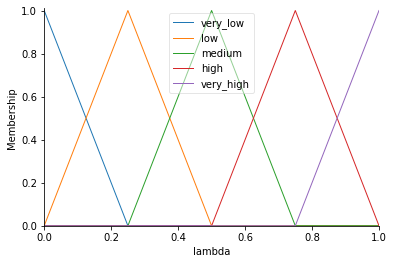

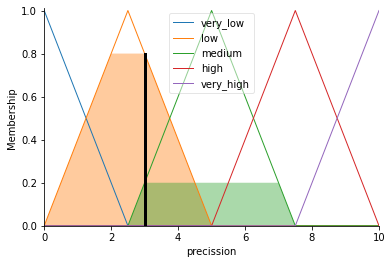

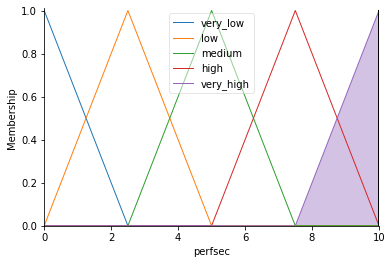

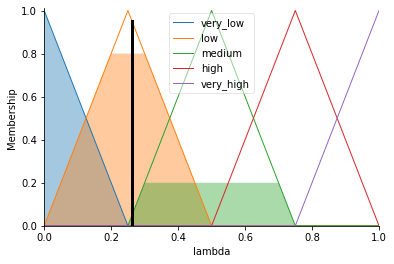

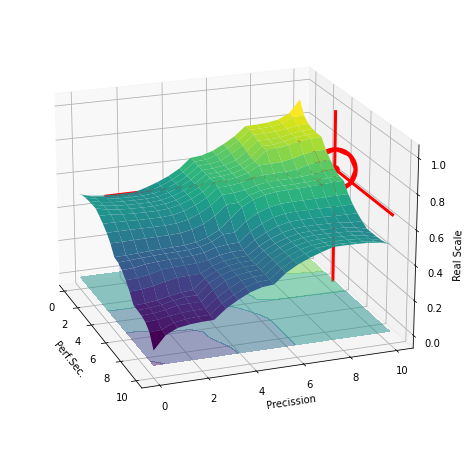

In [36]:
   
class LogQFL(BaseFL):
    """
    The _Sca scale is the amount of bits we reserve for the real scale.
    This is influenced by two factors:
        - The precision we want to achieve, because it involves the real precision.
        - The mult depth, since, the bigger the mult depth, the lower the bound can be set.
        - The performance is also influenced by the real scale. The better performance, the lower lambda.
        - The security is also influenced. The larger lambda, the lower security.
    """
    def __init__(self):
        super().__init__()
        
    def generate_antecedent(self):
        self.precision = BaseFL.get_precision()
        self.perfsec = BaseFL.get_perfsec()
    
    def generate_consequent(self):
        self.lambd = BaseFL.generate_lambda('consequent')
        
    def generate_rules(self):
        self.rules = []
        # Only in cases with all conditions, we consider feasible to have very_low real scale.
        # So having security, performance and mult_depth very_high abd very_low precision we can consider a very_low lambda
        self.rules.append(ctrl.Rule(antecedent=(self.precision['very_low'] | 
                                                self.perfsec['very_high']), 
                                    consequent=self.lambd['very_low'], 
                                    label='lambd very_low'))
        # if either mult_depth or performance or security are high or performance is low, we can have low lambd
        self.rules.append(ctrl.Rule(antecedent=(self.precision['low'] | 
                                                self.perfsec['high']), 
                                    consequent=self.lambd['low'], 
                                    label='lambd low'))
        # if either mult_depth or performance or security performance are medium, we can have medium lambd
        self.rules.append(ctrl.Rule(antecedent=(self.precision['medium'] |
                                                self.perfsec['medium']), 
                                    consequent=self.lambd['medium'], 
                                    label='lambd medium'))
        # if precision is low and mult depth is low then we get lambd low
        self.rules.append(ctrl.Rule(antecedent=(self.precision['high'] |
                                                self.perfsec['low']), 
                                    consequent=self.lambd['high'], 
                                    label='lambd high'))
        # Only in cases with all conditions, we consider feasible to have very_low real scale.
        # So having security, performance and mult_depth very_high abd very_low precision we can consider a very_low lambd
        self.rules.append(ctrl.Rule(antecedent=(self.precision['very_high'] | 
                                                self.perfsec['very_low']), 
                                    consequent=self.lambd['very_high'], 
                                    label='lambd very_high'))
    
    def generate_ctrl_system(self):
        self.ctrl_sys = ctrl.ControlSystem(self.rules)
        return self.ctrl_sys
    
    def simulate(self, precision, performance, security, plot=False):
        sim = ctrl.ControlSystemSimulation(self.ctrl_sys) # , flush_after_run=21 * 21 + 1)
        #perfsec = (performance + security) * 0.5
        perfsec = max(performance, security)
        sim.input['perfsec'] = perfsec
        sim.input['precision'] = precision
        sim.compute()
    

        if plot:
            self.precision.view(sim=sim)
            self.perfsec.view(sim=sim)
            self.lambd.view(sim=sim)
        print("For Precission[%d], Performance[%d] and Security[%d] we get: %0.2f" %(precision, performance, security, sim.output['lambda']))
        return sim.output['lambda']

        
        
    def plot_meshgrid(self, precision=None, performance=None, security=None):
        
        # We can simulate at higher resolution with full accuracy
        size_x, size_y = int(self.perfsec.universe[-1]), int(self.precision.universe[-1])
        sim = ctrl.ControlSystemSimulation(self.ctrl_sys, flush_after_run= (size_x * size_y) + 1)
        upsampled_x = self.perfsec.universe
        upsampled_y = self.precision.universe
        x, y = np.meshgrid(upsampled_y, upsampled_x)
        z = np.zeros_like(x)

        # Loop through the system 21*21 times to collect the control surface
        for i in range(0, len(upsampled_x)):
            for j in range(0, len(upsampled_y)):
                    sim.input['perfsec'] = x[i, j]
                    sim.input['precision'] = y[i, j]
                    sim.compute()
                    z[i, j] = sim.output['lambda']
                #dec_scale.view(sim=sim)
                #print(x[i, j], y[i, j], z[i, j])

        # Plot the result in pretty 3D with alpha blending
        import matplotlib.pyplot as plt
        from mpl_toolkits.mplot3d import Axes3D  # Required for 3D plotting

        fig = plt.figure(figsize=(8, 8))
        ax = fig.add_subplot(111, projection='3d')

        surf = ax.plot_surface(x, y, z, rstride=1, cstride=1, cmap='viridis',
                               linewidth=0.4, antialiased=True)
        
        
        perfsec = None
        
        if precision is None or performance is None or security is None:
            precision = 10
            performance = 4
            security = 4
            perfsec = 4
        else:
            #perfsec = (performance + security) * 0.5
            perfsec = max(performance, security)
        
    
        res = self.simulate(precision, performance, security)
        
        lines = np.arange(0, min(size_x, size_y), 1)
        
        lines_x = np.linspace(0, upsampled_y[-1], num=50)
        lines_y = np.linspace(0, upsampled_x[-1], num=50)
        lines_z = np.linspace(0, self.lambd.universe[-1], num=50)
        
        ones = np.ones_like(lines)
        ones_x = np.ones_like(lines_x)
        ones_y = np.ones_like(lines_y)
        ones_z = np.ones_like(lines_z)
        
        end = ones * lines[-1]
        end_x = ones_x * lines_x[-1]
        end_y = ones_y * lines_y[-1]
        end_z = ones_z * lines_z[-1]
        
        zeros = np.zeros_like(lines)
        zeros_x = np.zeros_like(lines_x)
        zeros_y = np.zeros_like(lines_y)
        zeros_z = np.zeros_like(lines_z)
        
        ax.scatter(perfsec, precision, res, color='red', linewidth=4) 
        ax.scatter(perfsec, precision, res, color='red', linewidth=40)
        ax.plot(perfsec * ones_x, precision * ones_y, lines_z, color='red', linewidth=3)
        ax.plot(perfsec * ones_x, lines_y, res * ones_z, color='red', linewidth=3)
        ax.plot(lines_x, precision * ones_y, res * ones_z, color='red', linewidth=3)

        ax.set_xlabel('Perf.Sec.')#, fontsize=20)
        ax.set_ylabel('Precission')
        ax.set_zlabel('Real Scale')
        cset = ax.contourf(x, y, z, zdir='z', offset=0, cmap='viridis', alpha=0.5)
        #cset = ax.contourf(x, y, z, zdir='x', offset=0, cmap='viridis', alpha=0.5)
        #cset = ax.contourf(x, y, z, zdir='y', offset=20, cmap='viridis', alpha=0.5)
        ax.view_init(20, 340)
        
lqfl = LogQFL()
lqfl.simulate(precision=3, performance=10, security=5, plot=True)
# precision, mult_depth, performance, security
#rsfl.simulate(1, 16, 9, 9)
lqfl.plot_meshgrid()

In [37]:
0.26 * 40

10.4